# Problem

Underly spot is $100, what is the maximun call spread price? (buy call @100, sell call @150).

the answer is 1/3 of $100.

Why???


In [ ]:
from py_vollib.black import black
from py_vollib.black.implied_volatility import implied_volatility

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [59]:
def cost_call_spread(out_level=0.15, sigma=0.3, r=0.01, t=0.03, spot=100):
    """
    calculate the cost of call spread
    """
    K = spot
    flag = 'c'
    F = spot
    atm_call_price = black(flag, F, K, t, r, sigma)
    # print('----- At Money Call -----')
    # print(atm_call_price)

    K = spot * (1+out_level)
    otm_call_price = black(flag, F, K, t, r, sigma)
    # print('----- Out Money Call -----')
    # print(otm_call_price)
    
    cost = (-atm_call_price + otm_call_price)/F * 100
    # print('----- Cost of Call Spread -----')
    # print('%.2f%%' % cost)
    
    return -cost

In [73]:
cost_call_spread(out_level=0.50, sigma=0.2, r=0.00, t=365/365)

7.7730921321087454

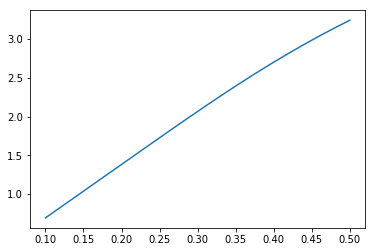

In [72]:
# Vol
vol = np.linspace(0.1, 0.5, 20)
cost = [cost_call_spread(sigma=v) for v in vol]
plt.plot(vol, cost)

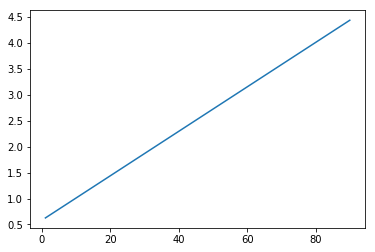

In [68]:
# T 
ts = np.linspace(1, 90, 2)
cost = [cost_call_spread(t=_/365) for _ in ts]
plt.plot(ts, cost)

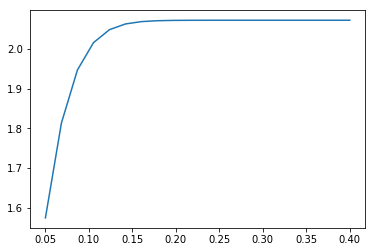

In [70]:
# Spread
spread = np.linspace(0.05, 0.40, 20)
cost = [cost_call_spread(out_level=_) for _ in spread]
plt.plot(spread, cost)